In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
from scipy.signal import find_peaks
plt.style.use('..\informes.mplstyle')

P

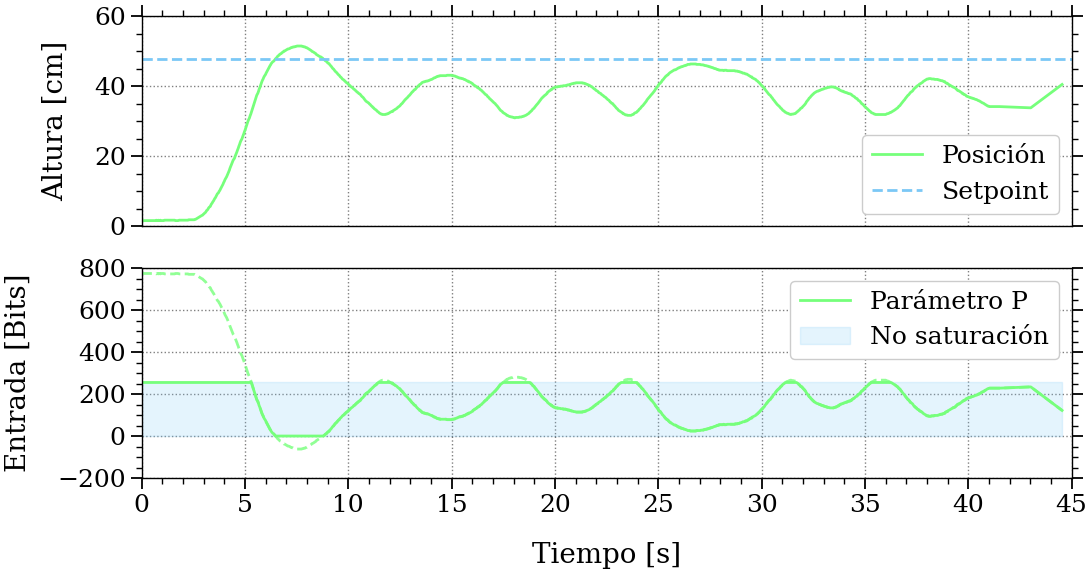

In [10]:
df = pd.read_csv('..\Mediciones\Clase 3\PID\PID-2-0-0-barrido.csv')
df = df[df['Time'] <= 45]

setpoint = df['Setpoint'][0]
pxlenght = df['Pixel Lenght'][0]
px2dist = lambda x: x * 71/pxlenght

t = df['Time'].values
h = px2dist(df['Position'].values)
P = df['P'].values


# FIGURA Y AXES

fig, ax = plt.subplots(2, 1, sharex=True)
# Arriba
ax[0].set_ylabel('Altura [cm]')
ax[0].set_ylim(0, 60)
ax[0].xaxis.set_tick_params(which='both', bottom=False)
# Abajo
ax[1].set_ylabel('Entrada [Bits]')
ax[1].set_xlabel('Tiempo [s]')
ax[1].set_xlim(0, 45)
ax[1].set_ylim(-200, 800)
ax[1].set_yticks(range(-200, 801, 200))
ax[1].xaxis.set_tick_params(which='both', top=False)


# PEAKS Y PLOTS

ax[0].plot(t, h, label='Posición')
ax[0].axhline(px2dist(setpoint), c='C1', ls='--', label='Setpoint')

Mpeaks = find_peaks(-np.abs(P-255)+10, height=0)[0]
mpeaks = find_peaks(-np.abs(P)+10, height=0)[0]

ax[1].plot(t, P, c='C0', ls='--', alpha=0.8)
P[P < 0] = 0
P[P > 255] = 255
ax[1].plot(t, P, c='C0', label='Parámetro P')
# ax[1].axhline(0, c='C1', ls='--')
# ax[1].axhline(255, c='C1', ls='--', label='Saturación')
ax[1].fill_between([t[0], t[-1]], 2*[0], 2*[255], color='C1',
                   alpha=0.2, label='No saturación')

ax[0].legend()
ax[1].legend()
plt.show()

In [3]:
# fig, ax = plt.subplots()
# ax.set_xlabel('Tiempo [s]')
# ax.set_ylabel('Altura [cm]')
# ax.set_xlim(0, 45)
# ax.set_ylim(0, 500)


# for I in np.round(np.arange(0.01, 0.11, 0.02), 2):
#     df = pd.read_csv(f'..\Mediciones\Clase 3\PID\PID-2-{I}-0-barrido.csv')
#     t = df['Time'].values
#     h = df['Position'].values
#     ax.plot(t, h, label=f'I = {I}')
# ax.axhline(400, c='C3', ls='--')

# ax.legend()
# plt.show()